In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import utils

In [5]:
eth_data = utils.load_eth_data()

[*********************100%***********************]  1 of 1 completed


In [6]:
close_data = eth_data['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_data = scaler.fit_transform(close_data.reshape(-1, 1))

In [7]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

In [8]:
train_size = int(len(scaled_close_data) * 0.8)
sequence_length = 60

In [9]:
train_data = scaled_close_data[:train_size]
test_data = scaled_close_data[train_size:]

In [10]:
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0591 - val_loss: 0.0049
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0039 - val_loss: 0.0025
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0

In [14]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [15]:
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [16]:
mse, mae, rmse = utils.get_metrics(real_prices, predicted_prices)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 85.08196659952092
MSE: 14514.017237171895
RMSE: 120.47413513767964


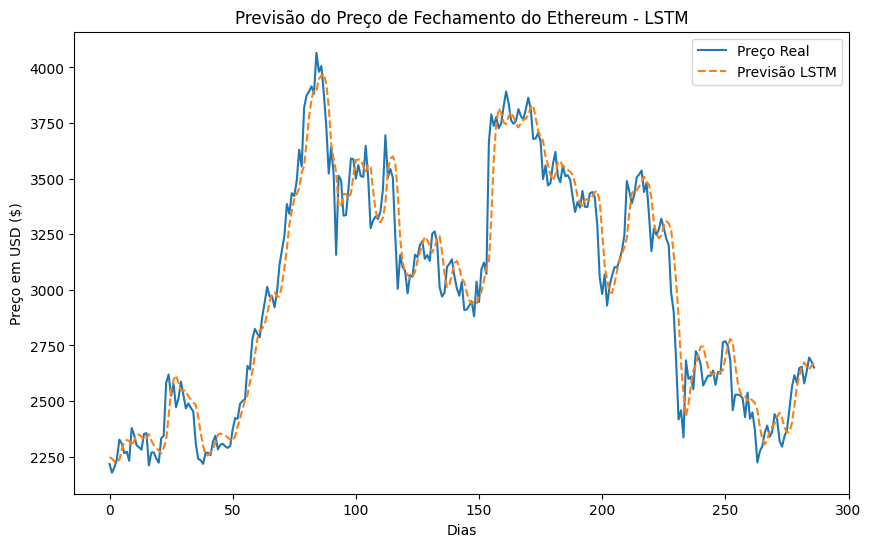

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Preço Real')
plt.plot(predicted_prices, label='Previsão LSTM', linestyle='--')
plt.title('Previsão do Preço de Fechamento do Ethereum - LSTM')
plt.xlabel('Dias')
plt.ylabel('Preço em USD ($)')
plt.legend()
plt.show()

# Andando pelo tempo

In [18]:
train_size = 100
test_size = 20
sequence_length = 15

all_predictions = []
all_test_data = []
mae_list, mse_list, rmse_list = [], [], []

In [19]:
for start in range(0, len(scaled_close_data) - train_size - test_size, test_size):
    data = scaled_close_data[start:start + train_size + test_size]

    train_data = data[:train_size]
    test_data = data[train_size:]

    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    predicted_prices_scaled = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    all_predictions.extend(predicted_prices)
    all_test_data.extend(real_prices)

    mse, mae, rmse = utils.get_metrics(real_prices, predicted_prices)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

    print(f"Janela {start//test_size + 1}: MSE={mse}")

/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Janela 1: MSE=810.9384791967461


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Janela 2: MSE=61.42246957356106


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
Janela 3: MSE=1877.8187779369757


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Janela 4: MSE=634.7323076374363


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Janela 5: MSE=71.65603536278927


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Janela 6: MSE=24046.550289196333


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Janela 7: MSE=11166.155971968732


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Janela 8: MSE=3452.59478315022


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Janela 9: MSE=679.4398774754269


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Janela 10: MSE=535.2929018309333


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Janela 11: MSE=3064.786092488095


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Janela 12: MSE=23768.864822651445


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Janela 13: MSE=9182.066800767183


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Janela 14: MSE=156405.90934939013


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Janela 15: MSE=50079.317502334714


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Janela 16: MSE=27036.61146402357


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Janela 17: MSE=4064.063027715683


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Janela 18: MSE=114343.70806395116


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Janela 19: MSE=125496.6102345913


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Janela 20: MSE=1257597.0262604947


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Janela 21: MSE=36060.688956177284


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Janela 22: MSE=270486.589371255


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Janela 23: MSE=57614.292649522424


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Janela 24: MSE=151915.99664533138


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Janela 25: MSE=106946.8625289797


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Janela 26: MSE=159037.16834768056


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Janela 27: MSE=43693.91895625591


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Janela 28: MSE=658954.9320476651


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Janela 29: MSE=297722.97636009456


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Janela 30: MSE=128340.84791872502


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Janela 31: MSE=3840.22888661623


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Janela 32: MSE=548597.9164424418


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Janela 33: MSE=299498.2856354595


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Janela 34: MSE=26045.90963486431


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Janela 35: MSE=75884.10056087971


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Janela 36: MSE=621718.0581139443


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Janela 37: MSE=2940.732139515877


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Janela 38: MSE=27612.737378668786


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Janela 39: MSE=199415.2851210505


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Janela 40: MSE=406832.21151709935


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Janela 41: MSE=21441.04338221253


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Janela 42: MSE=12542.645805457238


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Janela 43: MSE=59915.09939333498


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Janela 44: MSE=1903.2391843169928


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Janela 45: MSE=18638.20900890827


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Janela 46: MSE=35190.197028943876


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Janela 47: MSE=6473.412724238634


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Janela 48: MSE=50961.38328400254


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Janela 49: MSE=2629.1625461667777


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Janela 50: MSE=19752.35163117051


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Janela 51: MSE=28395.650893953418


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Janela 52: MSE=13759.135283777106


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Janela 53: MSE=3290.996874913574


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Janela 54: MSE=22117.76169015467


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Janela 55: MSE=108755.80076937673


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Janela 56: MSE=26077.322936224937


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Janela 57: MSE=404.04442001879215


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Janela 58: MSE=5306.528407716751


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Janela 59: MSE=1346.7295534044504


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Janela 60: MSE=35569.79823688271


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Janela 61: MSE=3176.5001120626926


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Janela 62: MSE=18159.68552983403


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Janela 63: MSE=4575.672530162335


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Janela 64: MSE=56734.91627441642


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Janela 65: MSE=6095.157079869516


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Janela 66: MSE=5265.73741247356


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Janela 67: MSE=134893.35487073666


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Janela 68: MSE=92301.73728910982


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Janela 69: MSE=61054.806591463086


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Janela 70: MSE=20604.135066175462


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Janela 71: MSE=108584.37121669055


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Janela 72: MSE=179142.8458473444


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Janela 73: MSE=36972.54574142695


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Janela 74: MSE=17220.23638528587


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Janela 75: MSE=9843.892031216641


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Janela 76: MSE=211692.55466822395


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Janela 77: MSE=49372.14034765959


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Janela 78: MSE=65300.63186858893


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Janela 79: MSE=280990.5948302626


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Janela 80: MSE=69073.94474645852


/home/eduardo-barreto/inteli/ponderada/do-you-want-to-play-ETH/notebooks/env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Janela 81: MSE=16290.124794316293


In [20]:
mse_overall, mae_overall, rmse_overall = utils.get_metrics(all_test_data, all_predictions)

print(f'MAE: {mae_overall}')
print(f'MSE: {mse_overall}')
print(f'RMSE: {rmse_overall}')

MAE: 220.36659900053047
MSE: 97029.02966682614
RMSE: 311.49483088299576


In [21]:
interpolated_mae = np.repeat(mae_list, len(all_test_data) // len(mae_list))
test_data_indices = eth_data.index[-len(all_test_data):]

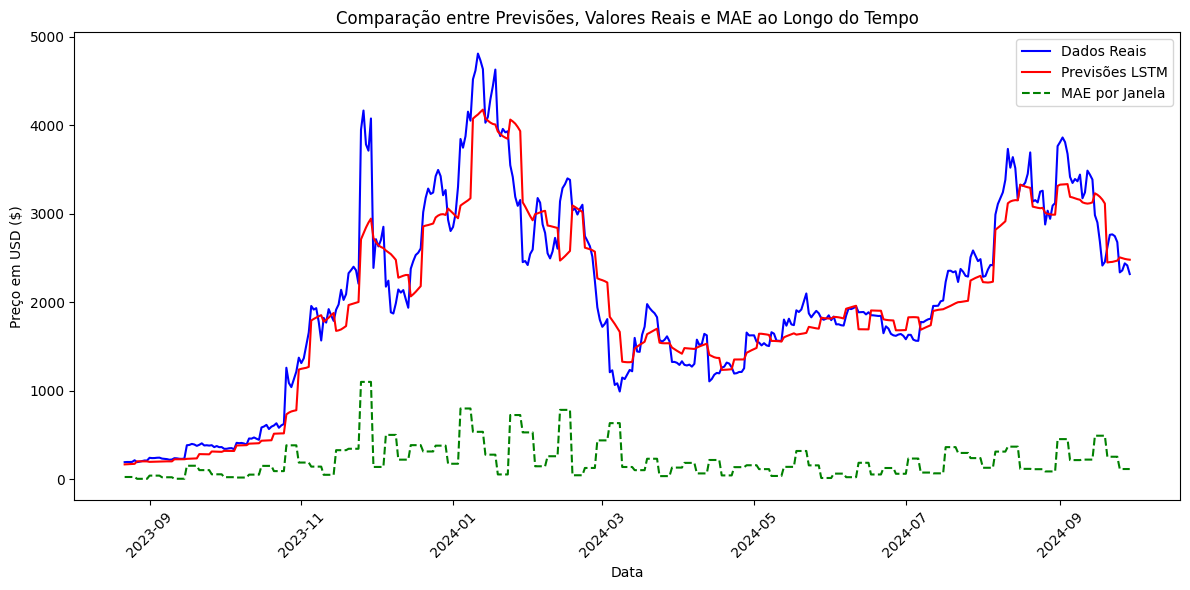

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(test_data_indices, all_test_data, label='Dados Reais', color='blue')
plt.plot(test_data_indices, all_predictions, label='Previsões LSTM', color='red')
plt.plot(test_data_indices, interpolated_mae, label='MAE por Janela', color='green', linestyle='--')
plt.title('Comparação entre Previsões, Valores Reais e MAE ao Longo do Tempo')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Preço em USD ($)')
plt.legend()
plt.tight_layout()
plt.show()